Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [8]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [110]:
def wrangle(filepath):
    df = pd.read_csv(
        filepath,
        parse_dates=['created'],
#         index_col='created'       
    ).dropna()
    df.sort_values(by=['created'], inplace=True)
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    df['month'] = pd.DatetimeIndex(df['created']).month
    df = df.set_index('month')
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [120]:
import pandas as pd
import numpy as np
df = wrangle(filepath)
print(df.shape)
print(df.info())
print(df.head())
df.tail()

(47260, 34)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47260 entries, 4 to 6
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bathrooms             47260 non-null  float64       
 1   bedrooms              47260 non-null  int64         
 2   created               47260 non-null  datetime64[ns]
 3   description           47260 non-null  object        
 4   display_address       47260 non-null  object        
 5   latitude              47260 non-null  float64       
 6   longitude             47260 non-null  float64       
 7   price                 47260 non-null  int64         
 8   street_address        47260 non-null  object        
 9   interest_level        47260 non-null  object        
 10  elevator              47260 non-null  int64         
 11  cats_allowed          47260 non-null  int64         
 12  hardwood_floors       47260 non-null  int64         
 13  dogs_all

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
month,,,,,,,,,,,,,,,,,,,,,
6,1.0,2,2016-06-29 17:47:34,"Newly renovated, clean, quiet & very bright 2...",At Thompson St,40.7261,-74.0014,3045,132 Thompson St #20,medium,...,0,0,0,0,0,0,0,0,0,0
6,1.0,1,2016-06-29 17:56:12,Historic conversion in Greenpoint with awesome...,"100 Dupont St, Brooklyn, NY 11222",40.7358,-73.9560,2648,100 Dupont St,low,...,0,0,0,0,0,0,0,0,0,0
6,1.0,1,2016-06-29 18:14:48,"Large, sunny one bedroom apartment with a sepa...",West 45th St. and 8th Ave.,40.7597,-73.9890,2650,305 West 45th St.,low,...,0,0,0,0,0,0,0,0,0,0
6,1.0,3,2016-06-29 18:30:41,LOOK NO FURTHER!!\r\rMassive three bedroom apa...,williamsburg,40.7156,-73.9540,3200,32 Havemeyer Street,medium,...,0,0,0,0,0,0,0,0,0,0
6,1.0,3,2016-06-29 21:41:47,LOOK NO FURTHER!!\r\rMassive three bedroom apa...,williamsburg,40.7156,-73.9540,3399,32 Havemeyer Street,medium,...,0,0,0,0,0,0,0,0,0,0


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

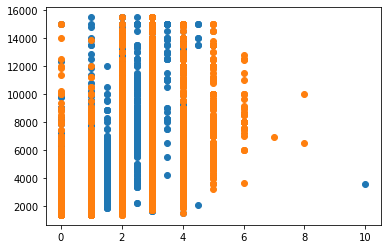

In [121]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.
import matplotlib.pyplot as plt
plt.scatter(df['bathrooms'], df['price'])
plt.scatter(df['bedrooms'], df['price'])

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [122]:
X = df[['bedrooms', 'bathrooms']]
y = df['price']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [123]:
cutoff = 6
mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [125]:
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1202.3983007818476


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [126]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [127]:
training_mae = mean_absolute_error(y_train,model.predict(X_train))
test_mae = mean_absolute_error(y_test,model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 815.2251425254885
Test MAE: 823.1308043209864


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [128]:
from sklearn.metrics import r2_score

training_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.511857964961526
Test MAE: 0.5236070636808525


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.